In [88]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


demo_list = pd.read_csv("../_data/raw/data.csv")


In [89]:
demo_list.head()

,Race/Ethnicity,Sex,Department,Age,Hourly Rate,Regular/Temporary,Employee Status
0,Hispanic or Latino/a/x,Male,Seattle Police Department,43,66.16,R,Active
1,White,Male,Construction and Inspections,60,59.55,R,Active
2,Native Hawaiian or Other Pacific Islander,Male,Parks and Recreation Department,28,32.31,T,Active
3,White,Male,Parks and Recreation Department,19,25.98,T,Active
4,White,Male,Seattle Center,58,49.34,R,Leave with Pay


In [90]:
demo_list["Department"].value_counts()

Department
Parks and Recreation Department                             1879
Seattle City Light                                          1800
Seattle Police Department                                   1600
Seattle Public Utilities                                    1517
Seattle Department of Transportation                        1178
Seattle Fire Department                                     1089
Seattle Public Library                                       654
Seattle Center                                               637
Finance and Administrative Service                           584
Information Technology                                       579
Human Services                                               471
Construction and Inspections                                 417
Seattle Municipal Courts                                     217
Law Department                                               213
Community Safety and Communication Center                    182
Education and 

- Most number of employees: Parks and Rec, Seattle City Light, SPD

In [91]:
sex_counts = demo_list["Sex"].value_counts()
male_count = sex_counts["Male"]
female_count = sex_counts["Female"]
nonb_count = sex_counts.get("Non-Specified", 0)
x_count = sex_counts.get("X", 0)

ratio = male_count/female_count
other_count = nonb_count + x_count
print("Ratio of men to women", ratio)
print("Number of nonbinary & unspecified", other_count)


Ratio of men to women 1.5555351232070613
Number of nonbinary & unspecified 66


In [92]:
def calculate_ratio(group):
  male_count = (group == "Male").sum()
  female_count = (group == "Female").sum()

  return male_count / female_count if female_count != 0 else 0


# Male and female
gender_counts_by_dept = demo_list.groupby("Department")["Sex"].agg(calculate_ratio)

print('\nDepartments with highest M:F ratio')
print(gender_counts_by_dept.sort_values(ascending=False).head(10))

print("\nDepartments with lowest M:F ratio")
print(gender_counts_by_dept.sort_values().head(10))



Departments with highest M:F ratio
Department
Seattle Fire Department                 7.782258
Seattle Police Department               2.895122
Seattle City Light                      2.351402
Seattle Department of Transportation    1.913151
Information Technology                  1.805825
Seattle Center                          1.781659
Seattle Public Utilities                1.629371
Parks and Recreation Department         1.453473
Construction and Inspections            1.350282
Finance and Administrative Service      1.229008
Name: Sex, dtype: float64

Departments with lowest M:F ratio
Department
Police Relief and Pension          0.000000
Economic and Revenue Forecasts     0.000000
Immigration and Refugee Affairs    0.090909
Civil Service Commissions          0.111111
Office of the Employee Ombud       0.166667
Education and Early Learning       0.239583
Hearing Examiner                   0.250000
Neighborhoods                      0.265306
Human Services                     0.30

In [93]:
parks_rec = demo_list[demo_list['Department'] == "Parks and Recreation Department"]
# Ratio of Regular / temporary - very high for parks and rec
parks_rec['Regular/Temporary'].value_counts()


# Filter for regular employees in Parks and Recreation
reg_parks_rec = parks_rec[parks_rec['Regular/Temporary'] == 'R']

# Show gender breakdown of regular employees

reg_parks_rec['Sex'].value_counts()


Sex
Male             680
Female           360
Non-Specified      5
X                  1
Name: count, dtype: int64

In [94]:
# Gender breakdown with percentages
gender_counts = reg_parks_rec['Sex'].value_counts()
print("Reg employees gender breakdown:")
print(gender_counts)
print("\nPercentages:")
print((gender_counts / gender_counts.sum() * 100).round(2))

Reg employees gender breakdown:
Sex
Male             680
Female           360
Non-Specified      5
X                  1
Name: count, dtype: int64

Percentages:
Sex
Male             65.01
Female           34.42
Non-Specified     0.48
X                 0.10
Name: count, dtype: float64


In [95]:
# Hourly Rate by Gender

reg_parks_rec.groupby('Sex')['Hourly Rate'].mean()

Sex
Female           48.219139
Male             45.092971
Non-Specified    42.952000
X                30.540000
Name: Hourly Rate, dtype: float64

In [96]:
police = demo_list[demo_list['Department'] == 'Seattle Police Department']


# Gender breakdown with percentages
gender_counts = police['Sex'].value_counts()
print("Police gender breakdown:")
print(gender_counts)
print("\nPercentages:")
print((gender_counts / gender_counts.sum() * 100).round(2))




Police gender breakdown:
Sex
Male             1187
Female            410
Non-Specified       3
Name: count, dtype: int64

Percentages:
Sex
Male             74.19
Female           25.62
Non-Specified     0.19
Name: count, dtype: float64


In [97]:
# Average hourly rate by gender for each department
demo_list.groupby(['Department', 'Sex'])['Hourly Rate'].mean().unstack()

Sex,Female,Male,Non-Specified,X
Department,,,,
City Auditor's Office,76.170000,81.730000,NaN,NaN
City Budget Office,73.291739,76.035294,NaN,NaN
Civil Rights Office,60.183846,63.402727,NaN,NaN
Civil Service Commissions,63.358889,74.880000,NaN,NaN
Community Police Commission,69.555000,76.260000,49.460000,NaN
Community Safety and Communication Center,50.773670,50.801268,62.020000,39.88
Construction and Inspections,58.539096,65.637322,54.100000,NaN
Economic and Revenue Forecasts,NaN,71.865000,NaN,NaN
Education and Early Learning,55.066250,65.573913,NaN,NaN


In [98]:
# Hourly Rates by department, split into male and female
hourly_rates = demo_list.groupby(['Department', 'Sex'])['Hourly Rate'].mean().unstack().reset_index()

## Add ratio to hourly rate
hourly_rates['ratio'] = hourly_rates['Female'] / hourly_rates['Male']

# Average of female/non-specified/X rates divided by male rates
non_male_cols = ['Female', 'Non-Specified', 'X']
hourly_rates['w_nb_ratio'] = hourly_rates[non_male_cols].mean(axis=1) / hourly_rates['Male']

# Export department gender hourly rates to JSON
hourly_rates.to_json('../_data/processed/dept_gender_hourly_rates.json', orient='records')

In [99]:
# Get gender MF counts by department
gender_counts = demo_list.groupby(['Department', 'Sex']).size().unstack().reset_index().drop(columns=['Non-Specified', 'X'])

# Get hourly MF rates by department  
hourly_rates = demo_list.groupby(['Department', 'Sex'])['Hourly Rate'].mean().unstack().reset_index().drop(columns=['Non-Specified', 'X'])

combined = pd.merge(gender_counts, hourly_rates, on="Department", suffixes=(' Count', ' Rate'))

# Calculate ratios
combined['Gender Ratio'] = combined['Male Count'] / combined['Female Count']  # male:female count ratio
combined['Rate Ratio'] = combined['Female Rate'] / combined['Male Rate']      # male:female rate ratio

# convert to snake case
combined.columns = (
    combined.columns
    .str.replace(r'([a-z0-9])([A-Z])', r'\1_\2', regex=True)
    .str.replace(r'[-\s]+', '_', regex=True)
    .str.lower()
)

combined.to_json('../_data/processed/dept_gender.json', orient="records")

<Axes: title={'center': 'M:F Ratio by Dept'}, xlabel='department'>

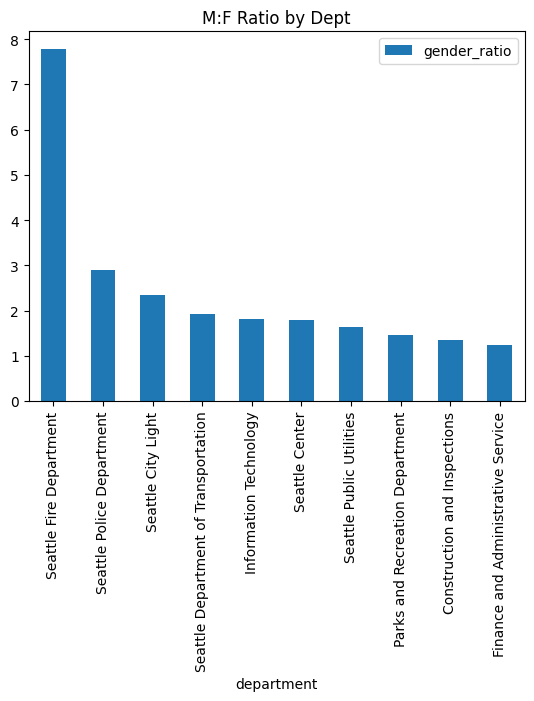

In [ ]:
combined.sort_values('gender_ratio', ascending=False, inplace=True)

combined.nlargest(10, columns='gender_ratio').plot.bar(0, y='gender_ratio', title="M:F Ratio by Dept")
